# Probability Distributions 3 and Mixture Models

Contents:

1. Histogram-based density estimation
    - Display histogram densities
2. Kernel density estimation
    - Hypercube Kernel function
    - Gaussian Kernel function
3. K-Nearest Neigbours classification
    - Generate data
    - Classification function
    - Display results
4. K-Means clustering
    - Display results

## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from math import sqrt, exp, pi
from collections import Counter
from scipy.stats import norm
from sklearn import datasets
from IPython.display import HTML
from math import floor
from collections import Counter

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate data

Function `generate_data_1D` that returns `n` number of 1D random variables exhibiting mixture of Gaussian distribution with parameters `means`, `variances` and `pi`.

In [2]:
def generate_data_1D(size, means, variances, pi):
    x=[]
    np.random.seed(10)
    for i in range(size):
        z_i = np.argmax(np.random.multinomial(1, pi))
        x_i = np.random.normal(means[z_i], variances[z_i]) 
        x.append(x_i) 
    return x

The function below generates 1000 data points from the Gaussian mixture distribution and plots their histogram.

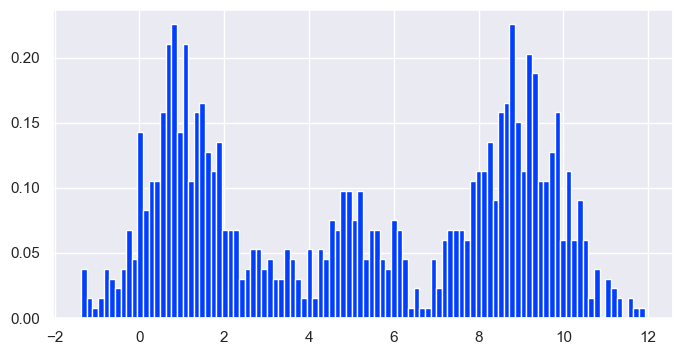

In [3]:
means = [1, 5, 9]
variances = [1, 1, 1]
pis = [0.4, 0.2, 0.4]
data = generate_data_1D(1000, means, variances, pis);
fig, ax = plt.subplots(figsize=(8, 4));
ax.hist(data, bins=100, density=True);

We observe that the histogram closely aligns with the data generated from three different Gaussian distributions with respective means of 1, 5, and 9, all with a variance of 1. This is evident from the three peaks in the histogram at these mean values. Additionally, the peaks corresponding to means 1 and 9 are taller than the one at mean 5. This is consistent with the specified mixture coefficients $\pi= 0.4$ for the Gaussian distributions with means 1 and 9, and 0.2 for the Gaussian distribution with mean 5. Therefore, the plot effectively coincides with the input data.

## 1) Histogram-based density estimation

Function `histogram` that takes input `data`, user-defined bin size `delta` and returns `bins` (list of edges of the bins) and their corresponding `probabilities`.

In [4]:
def histogram(data, delta):
    bins = np.arange(min(data), max(data)+delta, delta)
    hist, bin_edges = np.histogram(data, bins=bins)
    probs = hist/(sum(hist)*delta)
    print(len(bin_edges), len(probs))
    
    return bin_edges, probs

### 1.1) Display histogram densities

Displays the `histograms` for different values of bin sizes and also compute and plot the `true` probability density  of the data.

In [5]:
def univariate_normal(x, mean, variance):
    return ((1. / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance)))

def display_histogram_density(data, delta):
    bins, probs = histogram(data, delta)

    a = np.arange(-5, 15, 0.01)
    y = pis[0] * univariate_normal(a, mean=means[0], variance=variances[0]**2) + pis[1] * univariate_normal(a, mean=means[1], variance=variances[1]**2)+ pis[2] * univariate_normal(a, mean=means[2], variance=variances[2]**2)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.bar(bins[:-1],probs,width=0.1)
    ax.plot(a, y,'-r')

267 266


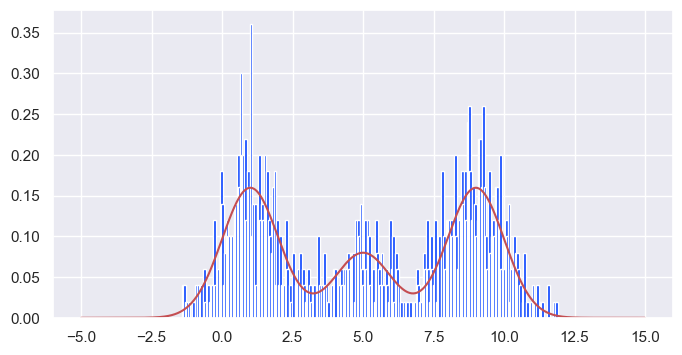

In [6]:
display_histogram_density(data, 0.05)

134 133


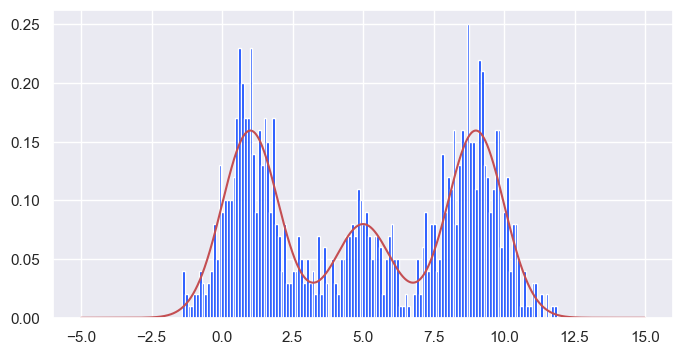

In [7]:
display_histogram_density(data, 0.1)

68 67


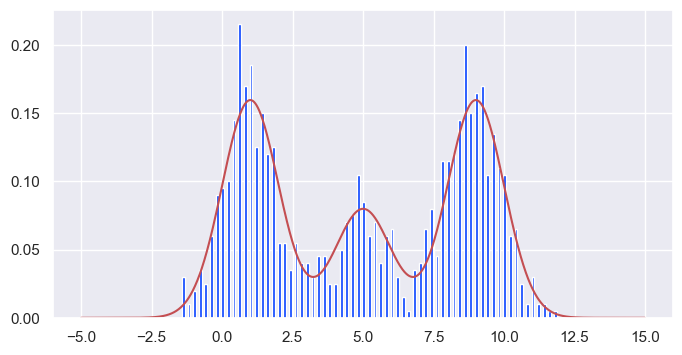

In [8]:
display_histogram_density(data, 0.2)

10 9


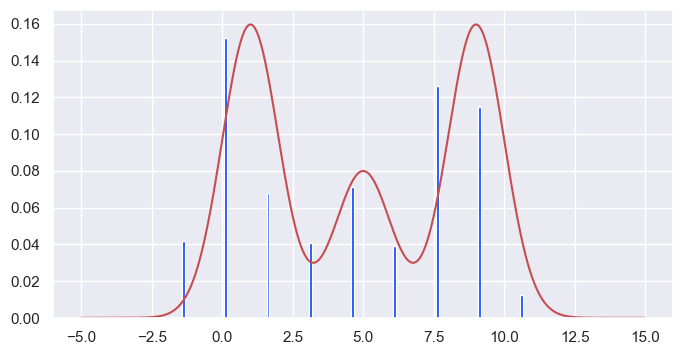

In [9]:
display_histogram_density(data, 1.5)

## 2) Kernel density estimation

### 2.1) Hypercube Kernel function

Function `hypercube_kernel_function` takes `u` and returns 0 or 1 if `u` is inside 1/2 hypercube.

In [10]:
def hypercube_kernel_function(u):
    return 1 if all([abs(x) <= 0.5 for x in u]) else 0

The function `hypercube_kernel_density` takes a single data point `x`, training data points `data`, size of a cube `h`, data dimensions `D` and returns the probability density of `x` based on the Hypercube kernel function.

In [11]:
def hypercube_kernel_density(x, data, h, D):
    return sum(np.array([hypercube_kernel_function([(x-x_n)/h]) for x_n in data]))/(len(data)*h**D)

Displays the computed nonparametric density estimates for different values of `h`.

In [12]:
def display_hypercube_kernel_density_1D(data, h, color='b'):
    xs = np.linspace(min(data), max(data), 200)
    plt.plot(xs, list(map(lambda x: hypercube_kernel_density(x, data, h, 1), xs)), '-' + color, label='h=' + str(h))
    plt.legend()

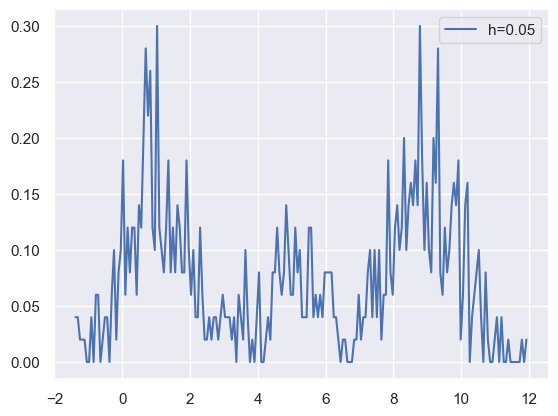

In [13]:
display_hypercube_kernel_density_1D(data, 0.05, 'b')

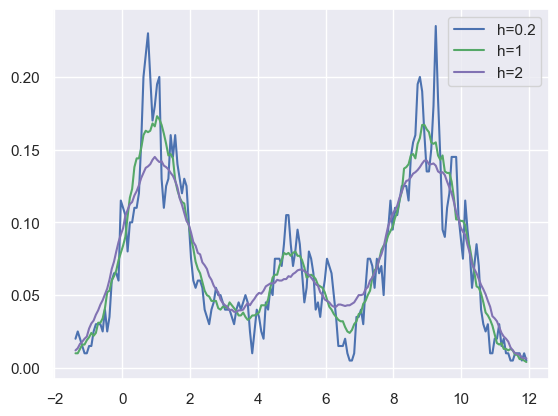

In [14]:
display_hypercube_kernel_density_1D(data, 0.2, 'b')
display_hypercube_kernel_density_1D(data, 1, 'g')
display_hypercube_kernel_density_1D(data, 2, 'm')

### 2.2) Gaussian Kernel function

The function `gaussian_kernel_function` takes pair of points `x` and `x_n`, size `h` and returns Gaussian kernel function value for the pair of points.

In [15]:
def gaussian_kernel_function(x, x_n, h):
    x, x_n = np.array(x), np.array(x_n)
    return exp(-np.linalg.norm(x-x_n)**2/(2*h**2))

The `gaussian_kernel_density` function takes any point `x`, training data points `data`, size `h` and returns the Gaussian kernel density value for the point `x`.

In [16]:
def gaussian_kernel_density(x, data, h):
    return sum(np.array([gaussian_kernel_function(x,x_n,h) for x_n in data]))/(len(data)*(2*pi*h**2)**0.5)

In [17]:
def display_gaussian_kernel_density_1D(data, h, color='b'):
    xs = np.linspace(min(data), max(data), 200)
    plt.plot(xs, list(map(lambda x: gaussian_kernel_density(x, data, h), xs)), '-' + color, label='h=' + str(h))
    plt.legend()

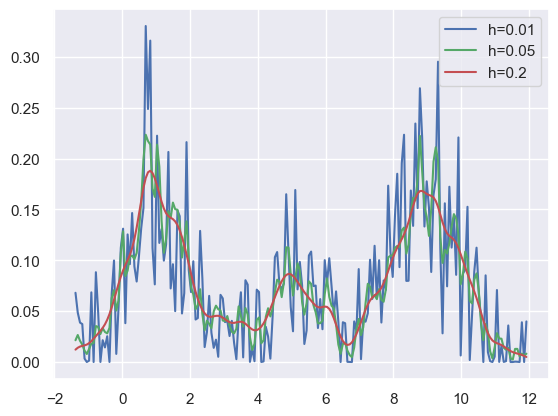

In [18]:
display_gaussian_kernel_density_1D(data, 0.01, 'b')
display_gaussian_kernel_density_1D(data, 0.05, 'g')
display_gaussian_kernel_density_1D(data, 0.2, 'r')

## 3) K-Nearest Neigbours classification

### 3.1) Generate Data

Using IRIS dataset from the sklearn library. Note that the data is 2-dimensional (two features).

(<matplotlib.collections.PathCollection at 0x1c748ea7490>,
 <matplotlib.legend.Legend at 0x1c748eaf990>)

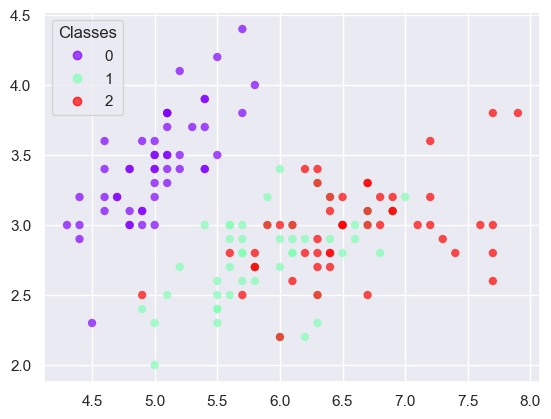

In [19]:
iris = datasets.load_iris()
iris_x = np.array(iris.data[:, :2])  # we only take the first two features.
iris_t = np.array(iris.target)

def plot_iris(legend=True, classes=iris_t, target=plt):
    scatter = target.scatter(iris_x[:, 0], iris_x[:, 1], c=classes, alpha=0.7, cmap='rainbow', edgecolor='none')
    if legend:
        legend = target.legend(*scatter.legend_elements(), loc="upper left", title="Classes")
        return (scatter, legend)
    return (scatter, )

plot_iris()

### 3.2) Classification function

The `k_nearest_classification` function takes a test data point `x`, training data points `data_x` and their associated classes `data_t`, the neighbours `k` and returns the predicted class for the test point `x`

In [20]:
def k_nearest_classification(x, data_x, data_t, k):
    x = np.array(x)
    data_category_pair = list(zip(data_x, data_t))

    k_nearest_points = sorted(data_category_pair, key=lambda y: np.linalg.norm(np.array(y[0]) - x))[:k]

    count = [point[1] for point in k_nearest_points]
    most_common_class = max(Counter(count), key=Counter(count).get)

    return most_common_class

### 3.3) Display results

Displays the classification results for different values of `K`

In [21]:
def plot_mesh(pred_fn, n_class=3, x_min=4, x_max=8, y_min=2, y_max=4.5, target=plt):
    h = 0.1  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array(list(map(lambda x: pred_fn(np.array(x)), np.c_[xx.ravel(), yy.ravel()])))
    Z = Z.reshape(xx.shape)
    cs = target.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))
    target.axis('tight')
    if hasattr(target, 'xlim'):
        target.xlim(x_min, x_max)
        target.ylim(y_min, y_max)

C:\Users\matti\AppData\Local\Temp\ipykernel_21116\3786169586.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cs = target.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))


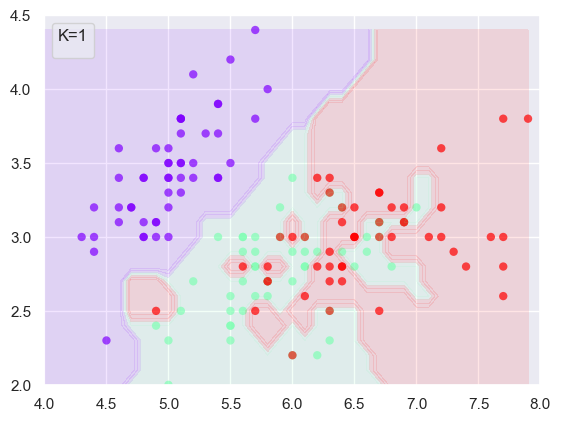

In [22]:
plot_iris(False)
plot_mesh(lambda x: k_nearest_classification(x, iris_x, iris_t, 1))
plt.legend([], loc="upper left", title="K=1")

C:\Users\matti\AppData\Local\Temp\ipykernel_21116\3786169586.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cs = target.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))


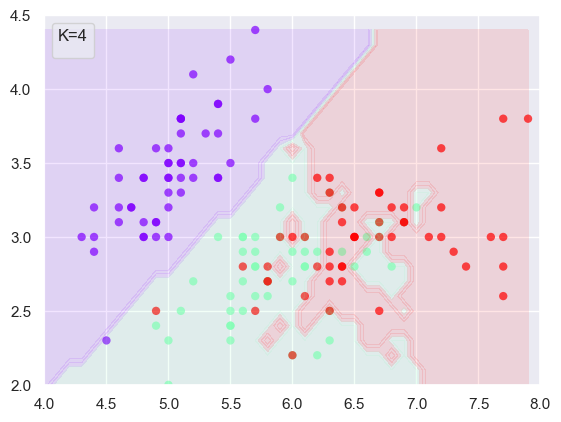

In [23]:
plot_iris(False)
plot_mesh(lambda x: k_nearest_classification(x, iris_x, iris_t, 4))
plt.legend([], loc="upper left", title="K=4")

C:\Users\matti\AppData\Local\Temp\ipykernel_21116\3786169586.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cs = target.contourf(xx, yy, Z, alpha = 0.1, cmap=plt.cm.get_cmap('rainbow', n_class))


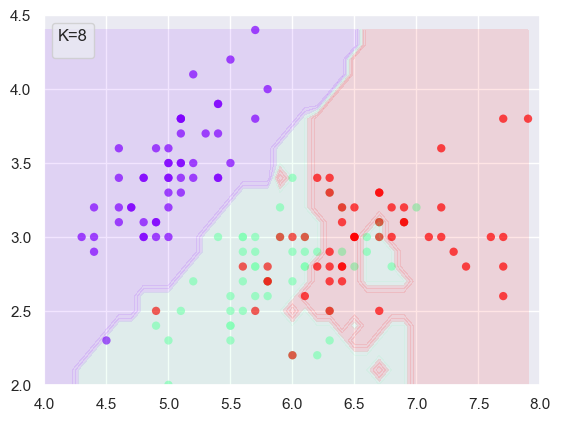

In [24]:
plot_iris(False)
plot_mesh(lambda x: k_nearest_classification(x, iris_x, iris_t, 8))
plt.legend([], loc="upper left", title="K=8")

## 4) K-Means clustering

The `k_means_step` function that takes initial means vector `mus_0`, input data points `data_x` and returns the new means `mus` and `classes` after running a single iteration of the K-means algorithm

In [25]:
def k_means_step(mus_0, data_x):
    n_data_points = len(data_x)
    n_clusters = len(mus_0)
    
    classes = np.zeros(n_data_points)
    
    for i, x in enumerate(data_x):
        distances = [np.linalg.norm(np.array(mu)-np.array(x)) for mu in mus_0]
        closes = np.argmin(distances)
        classes[i] = closes

    new_mus = np.array([data_x[classes == i].mean(axis=0) for i in range(n_clusters)])
    return new_mus, classes  

The following function, `distortion_measure`, takes means `mus`, `classes`, data points `data_x` and returns distortion of this classification.

In [26]:
def distortion_measure(mus, classes, data_x):
    
    result = 0
    
    for i, c in enumerate(classes):
        
        x = data_x[i]
        mu = mus[int(c)] # I get an error from this line without int()
        distance = np.dot(np.array(mu) - np.array(x), np.array(mu) - np.array(x))
        result += distance
    
    return result

`optimize_k_means` takes initial means `mus_0`, data points `data_x` and callback `on_step`. `on_step` is a function that takes current `mus` and `classes` and is being called each step. The function is used later to apply multiple steps of the k-means algorithm to converge on the `true` mean and corresponding classes.

In [27]:
def optimize_k_means(mus_0, data_x, on_step):
    while True:
        new_mus, classes = k_means_step(mus_0, data_x)
        on_step(new_mus, classes)
        
        if np.allclose(new_mus, mus_0):
            break
        mus_0 = new_mus

### 4.1) Display results

In [28]:
def plot_k_means(mus, classes, target=plt):
    plot = plot_iris(classes=classes, target=target)
    scatter = target.scatter(mus[:, 0], mus[:, 1], c=[0, 1, 2], cmap='rainbow', marker='X', s=300, edgecolors='black')
    return (*plot, scatter)

In [29]:
k = 3
mus_0 = iris_x[:k]

all_steps = []

optimize_k_means(mus_0, iris_x, lambda mus, classes: all_steps.append((mus, classes)))

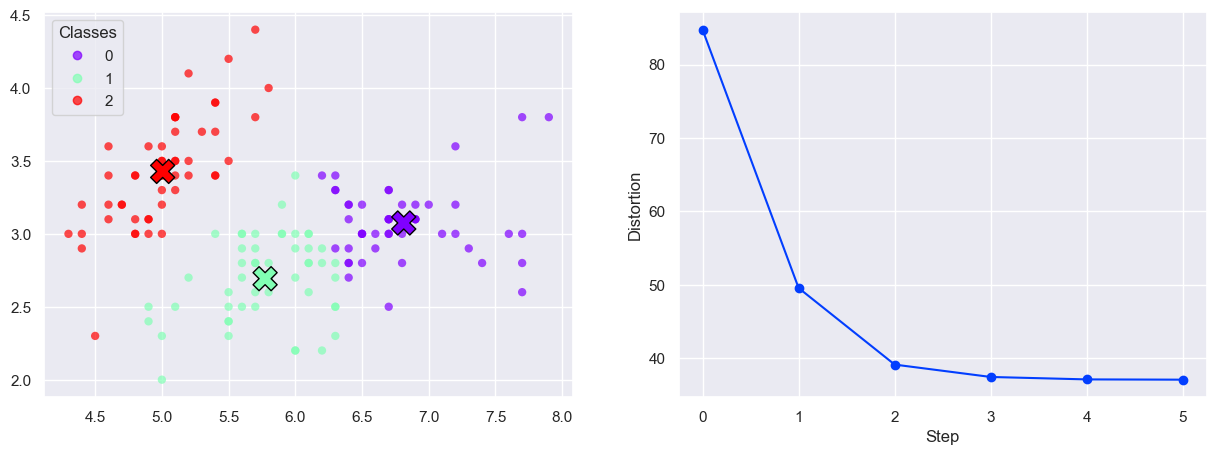

In [30]:
def create_animation(all_steps, data_x):
    
    distortions = list(map(
        lambda a: distortion_measure(a[0], a[1], data_x),
        all_steps
    ))
    
    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15,5))
    
    def animate(i):
        ax.cla()
        ax2.cla()
        
        plot1 = plot_k_means(all_steps[i][0], all_steps[i][1], target=ax)
        ax2.plot(list(range(i)), distortions[:i], '-o')
        plt.xlabel('Step')
        plt.ylabel('Distortion')
        return plot1
    
    anim = FuncAnimation(
        fig, animate,
        frames=len(all_steps), interval=500, blit=True
    )
    return HTML(anim.to_html5_video())

create_animation(all_steps, iris_x)